<a href="https://www.kaggle.com/code/abdalrhamnhebishy/tomatos-classification?scriptVersionId=192163614" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #FF0000 ;
    color: yellow;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

## Simple Introduce :

* This unstructured Data loaded from Kaggle . 

* I used Deep learning Techniques by using tensorflow pkgs .

* I divide Data into train set & validatio set after loading the data.

* I used ImageDataGenerator for preprocessing the Data .

## About Dataset: 

* This dataset contains annotated images of tomatoes at various stages of ripeness.


* It is designed to support research and development in agricultural automation, specifically for training machine learning models to distinguish between ripe and unripe tomatoes.

*  The dataset includes annotated images created using an annotate lab, ensuring precise and accurate labeling of ripeness status.

## imports :

In [2]:
# imports :

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow .keras.preprocessing.image import ImageDataGenerator

2024-08-11 19:42:54.980006: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-08-11 19:42:54.981437: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-11 19:42:55.008154: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-11 19:42:55.008731: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

2024-08-11 19:42:55.483015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

## preparing & Loading the Data :

In [3]:
# to unzip the file:
! unzip archive.zip

Archive:  archive.zip

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_1.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_10.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_11.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_12.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_13.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_14.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_15.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_16.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_17.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_18.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_19.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_2.jpeg  

  inflating: Riped and Unriped Tomato Dataset/Images/ri

In [4]:
# Paths to data directories
data="Riped and Unriped Tomato Dataset"


In [5]:
#get images , labels :

def get_image_tensor_from_path(image_path, label_path):
    images = []
    labels = []

    # Ensure the image path is a directory
    if os.path.isdir(image_path):
        for dir in os.listdir(image_path):
            dir_path = os.path.join(image_path, dir)
            # Check if the subpath is a directory
            if os.path.isdir(dir_path):
                for file in os.listdir(dir_path):
                    file_path = os.path.join(dir_path, file)
                    if os.path.isfile(file_path):
                        # Read the image file
                        image = tf.io.read_file(file_path)
                        image = tf.image.decode_jpeg(image)
                        image = tf.image.convert_image_dtype(image, tf.float32)
                        images.append(image)
                        # Assign label based on directory
                        label = 0 if dir == "Unriped_Tomato" else 1
                        labels.append(label)
    else:
        print(f"{image_path} is not a directory.")

    # Convert lists to tensors
    images = tf.stack(images)
    labels = tf.stack(labels)

    return images, labels

# Path to the images and labels
images_path = "Riped and Unriped Tomato Dataset/Images"
labels_path = "Riped and Unriped Tomato Dataset/labels"

# Get image tensors and labels
images, labels = get_image_tensor_from_path(images_path, labels_path)

images,labels

2024-08-11 19:42:59.934978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

2024-08-11 19:42:59.935450: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.

Skipping registering GPU devices...


(<tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>,
 <tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>)

In [6]:
#Define some parameters for the loader:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# split the data into train & validation sets :
train_ds = tf.keras.utils.image_dataset_from_directory(
data,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 177 files belonging to 2 classes.

Using 142 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 177 files belonging to 2 classes.

Using 35 files for validation.


In [9]:
# to know class names  :
class_names = train_ds.class_names
print(class_names)

['Images', 'labels']


In [10]:
#to know the shape of train_dataset:

for images,labels in train_ds:
    print("images shape :",images.shape)
    print("labels shape :",labels.shape)
    break

images shape : (32, 180, 180, 3)

labels shape : (32,)


In [11]:
# Classifiy the labels : 

labels_data = 'Riped and Unriped Tomato Dataset/labels'
Riped_labels = []
unRiped_labels = []
for file_name in os.listdir(labels_data):
    file_path = os.path.join(labels_data,file_name)
    if file_name.endswith('.txt'):
        if 'unriped' in file_name:
            unRiped_labels.append(file_path)
        else:
            Riped_labels.append(file_path)

print("- Number of Riped labels =",len(Riped_labels))
print("- Number of unriped labels=",len(unRiped_labels))
print(f"- riped_labels_shape:{np.shape(Riped_labels)}\n- unriped_labels_shape:{np.shape(unRiped_labels)}")

- Number of Riped labels = 97

- Number of unriped labels= 80

- riped_labels_shape:(97,)

- unriped_labels_shape:(80,)


## Visualizing the Data :

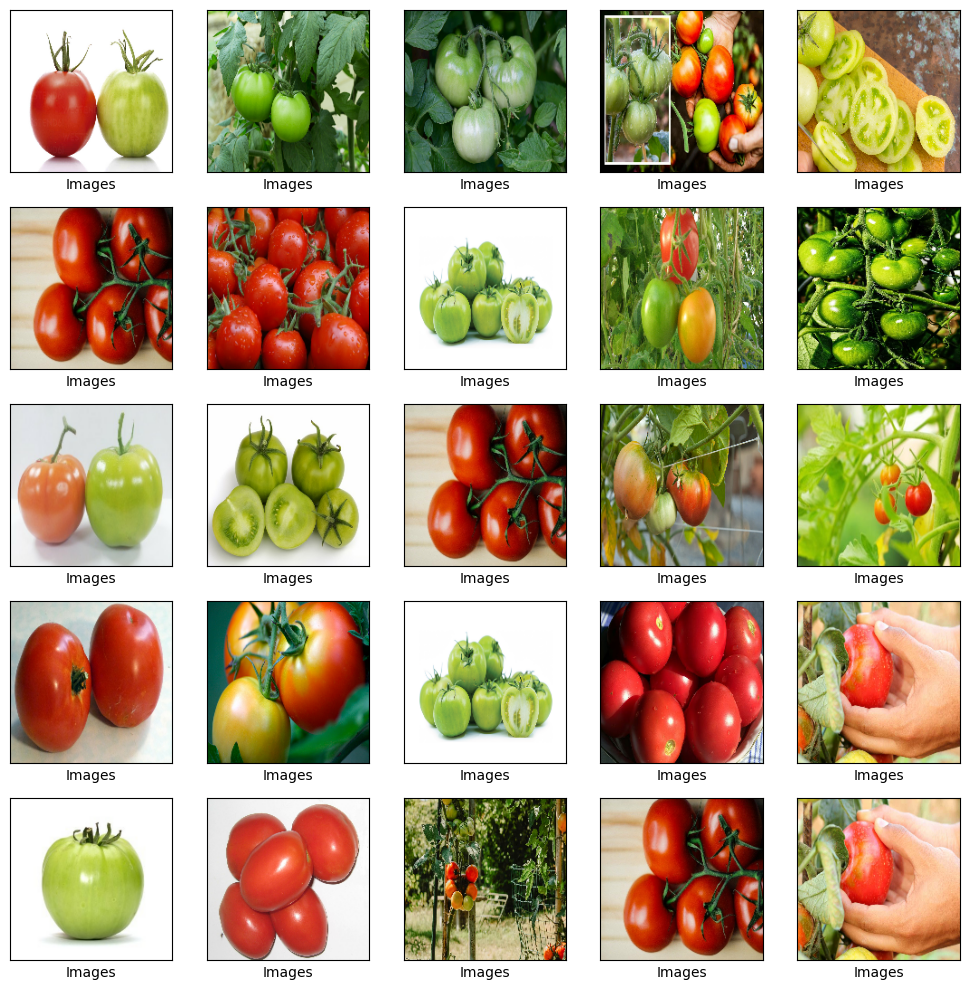

In [17]:
# Take one batch from the training dataset
for x, y in train_ds.take(1):

    plt.figure(figsize=(10, 10))
    batch_size = min(25, x.shape[0])
    
    for i in range(batch_size):
        plt.subplot(5, 5, i + 1)  
        plt.imshow(x[i].numpy().astype("uint8"))  
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_names[y[i].numpy()]) 

    plt.tight_layout()
    plt.show()

## Data  Preprocessing :

In [18]:
# preprocessing the data :
def reshape_and_normalize(images_data):
     # reshape :
    images=images.reshape(images_data.reshape[0],images_data.reshape[1],images_data.reshape[2],1)
    
    #Normalize :
    images=images_data/255
    return images



In [19]:
# Agumention :
# function to change from brightness or reloation of the image :

def agument(image):
    image = tf.image.random_brightness(image, max_delta=32.0/255.0)  # change brightness of image
    image = tf.image.random_flip_left_right(image)  # change position of image
    image = tf.image.random_flip_up_down(image)
    return image

def load_and_agument_images(images_path):
    images = []
    
    # Ensure the images path is a directory
    if os.path.isdir(images_path):
        for dir in os.listdir(images_path):
            dir_path = os.path.join(images_path, dir)
            # Check if the subpath is a directory
            if os.path.isdir(dir_path):
                for file in os.listdir(dir_path):
                    file_path = os.path.join(dir_path, file)
                    if os.path.isfile(file_path):
                        # Read the image file
                        image = tf.io.read_file(file_path)
                        image = tf.image.decode_jpeg(image, channels=3)
                        image = tf.image.convert_image_dtype(image, tf.float32)
                        # Apply augmentation
                        image = agument(image)
                        images.append(image)
    else:
        print(f"{images_path} is not a directory.")

    # Convert list to tensor
    images = tf.stack(images)
    return images

# Path to the images
images_path = "Riped and Unriped Tomato Dataset/Images"

# Load and augment images
images = load_and_agument_images(images_path)

# Print the shape of the tensor
print(f"Images shape: {images.shape}")

Images shape: (0,)


In [20]:
# Define a Callback class that stops training once accuracy reaches 99.9%

class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

## Transfer learning - Create the pre-trained model


In [21]:
# Download the inception v3 weights
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-08-11 19:44:59--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.37.219, 142.251.37.187, 142.251.37.59, ...

Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.37.219|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 87910968 (84M) [application/x-hdf]

Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’



/tmp/inception_v3_w 100%[===================>]  83.84M  2.25MB/s    in 38s     



2024-08-11 19:45:38 (2.19 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]




In [22]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [23]:
# Pre_trained model:

pre_trained_model=InceptionV3(

    input_shape=(180,180,3),
    include_top=False,
    weights=None
)
pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
    layer.trainable=False
pre_trained_model.summary()    

Model: "inception_v3"

__________________________________________________________________________________________________

 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            

                                                                                                  

 conv2d (Conv2D)             (None, 89, 89, 32)           864       ['input_1[0][0]']             

                                                                                                  

 batch_normalization (Batch  (None, 89, 89, 32)           96        ['conv2d[0][0]']              

 Normalization)                                                                                   

                                                                                                  

 activation (Activation)     (None, 89, 89, 32)           0         ['batch_

In [25]:
# search & get on the output layer (mixed7):

last_layer=pre_trained_model.get_layer('mixed7')
l_output=last_layer.output

In [26]:
# use the output layer in mu model :

from tensorflow.keras.optimizers import RMSprop

x=Flatten()(l_output)
x=Dense(1024,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(1,activation="sigmoid")(x)

model=Model(pre_trained_model.input,x)
model.summary()

# make optimizer & compile for the model :

model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='binary_crossentropy',
                   metrics=["accuracy"] )



Model: "model"

__________________________________________________________________________________________________

 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            

                                                                                                  

 conv2d (Conv2D)             (None, 89, 89, 32)           864       ['input_1[0][0]']             

                                                                                                  

 batch_normalization (Batch  (None, 89, 89, 32)           96        ['conv2d[0][0]']              

 Normalization)                                                                                   

                                                                                                  

 activation (Activation)     (None, 89, 89, 32)           0         ['batch_normali

In [27]:
# training the model :
callbacks=myCallback()
print("\n Model Training :")
history=model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=5,
        verbose=2,
        callbacks=callbacks)



 Model Training :

Epoch 1/5

5/5 - 6s - loss: 1.0155 - accuracy: 0.8944 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 6s/epoch - 1s/step

Epoch 2/5



Reached 99.9% accuracy so cancelling training!

5/5 - 4s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 4s/epoch - 711ms/step


In [28]:
print("\n Model Prediction :")
y_predict=model.predict(val_ds)
y_predict[:10]



 Model Prediction :

2/2 [==============================] - 1s 39ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [29]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_predict)} \n the max_value for prediction --->>> {np.max(y_predict)} ")

the min_value for prediction --->> 0.0 

 the max_value for prediction --->>> 0.0 


In [30]:
# Evalute on the test set:

print("\n Model Evaluation :")
test_loss = model.evaluate(val_ds, verbose=2)
print(test_loss)



 Model Evaluation :

2/2 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 592ms/epoch - 296ms/step

[0.0, 1.0]


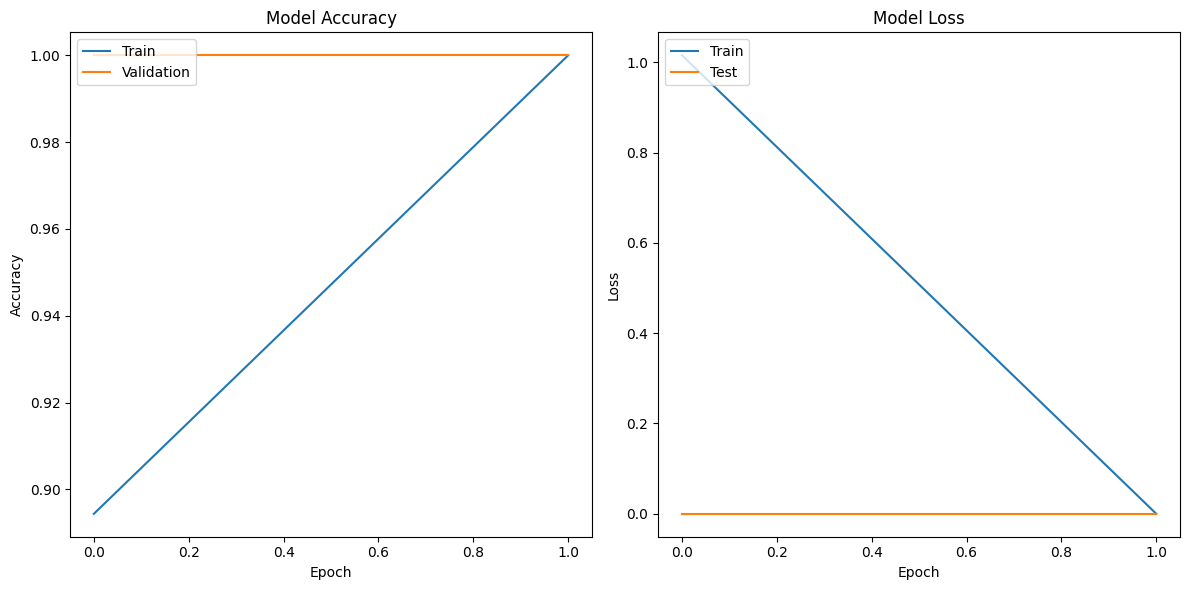

In [31]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Save & Load the model :

In [32]:
# Save the model
model.save('tomatos_model.h5')

# Load the trained model
model = tf.keras.models.load_model('tomatos_model.h5')

/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


## End project 

* Devloper : AbdalRahman Gameel Ahmed Hebishy

* if you find my Notebook useful upvote me & Leave a comment if you have any Question

* Kaggle works : https://www.kaggle.com/work
   